## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    input_layer_bn = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer_bn)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bs in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bs, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-batch size-%s" % str(bs)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
outp

50000/50000 [==============================] - 24s 482us/step - loss: 0.5553 - acc: 0.8047 - val_loss: 1.6745 - val_acc: 0.5213
Epoch 46/50
50000/50000 [==============================] - 23s 463us/step - loss: 0.5392 - acc: 0.8078 - val_loss: 1.7217 - val_acc: 0.5143
Epoch 47/50
50000/50000 [==============================] - 27s 541us/step - loss: 0.5427 - acc: 0.8039 - val_loss: 1.7008 - val_acc: 0.5226
Epoch 48/50
50000/50000 [==============================] - 20s 401us/step - loss: 0.5336 - acc: 0.8109 - val_loss: 1.7384 - val_acc: 0.5207
Epoch 49/50
50000/50000 [==============================] - 20s 396us/step - loss: 0.5261 - acc: 0.8152 - val_loss: 1.7290 - val_acc: 0.5235
Epoch 50/50
50000/50000 [==============================] - 20s 397us/step - loss: 0.5256 - acc: 0.8126 - val_loss: 1.7366 - val_acc: 0.5156
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072

50000/50000 [==============================] - 10s 207us/step - loss: 0.2727 - acc: 0.9080 - val_loss: 2.1594 - val_acc: 0.4982
Epoch 45/50
50000/50000 [==============================] - 11s 213us/step - loss: 0.2603 - acc: 0.9142 - val_loss: 2.1831 - val_acc: 0.5090
Epoch 46/50
50000/50000 [==============================] - 11s 213us/step - loss: 0.2505 - acc: 0.9161 - val_loss: 2.2337 - val_acc: 0.5024
Epoch 47/50
50000/50000 [==============================] - 11s 213us/step - loss: 0.2495 - acc: 0.9161 - val_loss: 2.2048 - val_acc: 0.5031
Epoch 48/50
50000/50000 [==============================] - 11s 216us/step - loss: 0.2332 - acc: 0.9225 - val_loss: 2.2759 - val_acc: 0.5022
Epoch 49/50
50000/50000 [==============================] - 11s 214us/step - loss: 0.2236 - acc: 0.9256 - val_loss: 2.2844 - val_acc: 0.5026
Epoch 50/50
50000/50000 [==============================] - 10s 207us/step - loss: 0.2152 - acc: 0.9297 - val_loss: 2.3200 - val_acc: 0.5001
________________________________

50000/50000 [==============================] - 8s 169us/step - loss: 0.2997 - acc: 0.9118 - val_loss: 2.0172 - val_acc: 0.5033
Epoch 44/50
50000/50000 [==============================] - 9s 171us/step - loss: 0.2823 - acc: 0.9184 - val_loss: 2.0478 - val_acc: 0.4939
Epoch 45/50
50000/50000 [==============================] - 8s 167us/step - loss: 0.2692 - acc: 0.9230 - val_loss: 2.0877 - val_acc: 0.4953
Epoch 46/50
50000/50000 [==============================] - 9s 172us/step - loss: 0.2553 - acc: 0.9274 - val_loss: 2.0894 - val_acc: 0.4949
Epoch 47/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.2509 - acc: 0.9280 - val_loss: 2.1170 - val_acc: 0.4947
Epoch 48/50
50000/50000 [==============================] - 9s 173us/step - loss: 0.2339 - acc: 0.9336 - val_loss: 2.1562 - val_acc: 0.4921
Epoch 49/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.2323 - acc: 0.9335 - val_loss: 2.2018 - val_acc: 0.4904
Epoch 50/50
50000/50000 [==============

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

'Code Here\n將結果繪出\n'

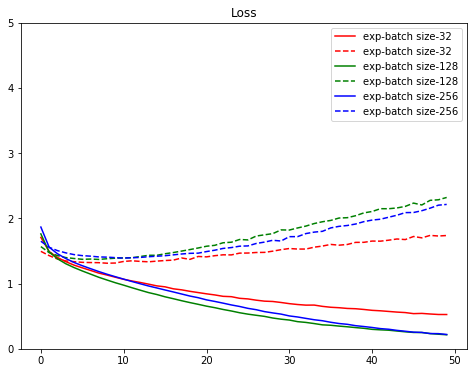

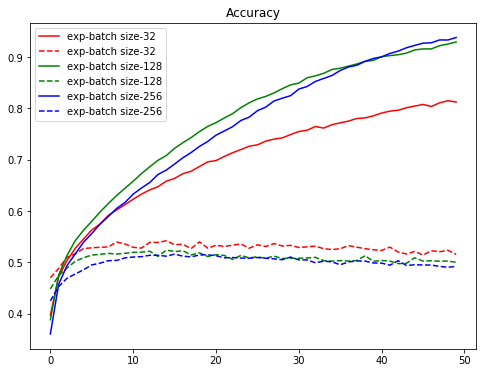

In [9]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()